In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web crwaling...used to scrap specific content 
import re

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# creating empty reviews list
oneplus_reviews=[]

In [6]:
for i in range(1,21):
  ip=[]  
  url="https://www.amazon.in/OnePlus-Silver-Storage-hands-free-capable/product-reviews/B09MQBRCSZ/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)  
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all("span", attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
 
  oneplus_reviews = oneplus_reviews + ip

In [7]:
# writng reviews in a text file 
with open("oneplus.txt", "w", encoding='utf8') as output:
    output.write(str(oneplus_reviews))

In [8]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(oneplus_reviews)

In [9]:
import nltk
# from nltk.corpus import stopwords

In [10]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+", " ", ip_rev_string).lower()
# ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [11]:
# words that contained in the reviews
ip_reviews_words = ip_rev_string.split(" ")

In [12]:
ip_reviews_words = ip_reviews_words[1:]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
ip_reviews_text = ' '.join(ip_reviews_words)
vectorizer = TfidfVectorizer(input='content', use_idf=True, ngram_range=(1, 1))
X = vectorizer.fit_transform([ip_reviews_text])

In [26]:
with open("stopwords.txt", "r") as sw:
    stop_words = sw.read()

In [27]:
stop_words = stop_words.split("\n")

In [28]:
stop_words.extend(["iphone","mobile","time","apple","phone","device","product","day"])


In [29]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

In [30]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

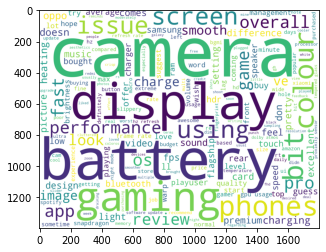

In [31]:
wordcloud_ip = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)
plt.imshow(wordcloud_ip)

In [32]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [33]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

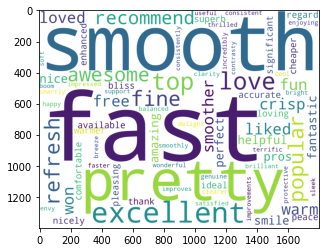

In [34]:
wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

In [35]:
# negative words Choose path for -ve words stored in system
with open("negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

In [36]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

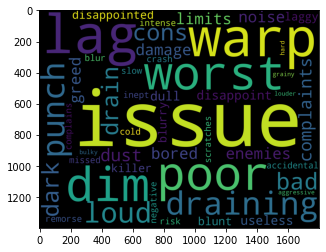

In [37]:
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)

In [38]:
# wordcloud with bigram
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [39]:
WNL = nltk.WordNetLemmatizer()

In [40]:
# Lowercase and tokenize
text = ip_rev_string.lower()

In [41]:
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")

In [42]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

In [43]:
# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]


In [44]:
# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['price', 'great'] # If you want to remove any particular word form text which does not contribute much in meaning

In [45]:
new_stopwords = stopwords_wc.union(customised_words)

In [46]:
# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]


In [48]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [49]:
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

In [50]:
# nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('built', 'quality'), ('quality', 'performance'), ('performance', 'camera'), ('camera', 'sound'), ('sound', 'battery'), ('battery', 'evrything'), ('evrything', 'top'), ('top', 'notch'), ('notch', 'review'), ('review', 'amazon'), ('amazon', 'mine'), ('mine', 'look'), ('look', 'usual'), ('usual', 'purchasing'), ('purchasing', 'popular'), ('popular', 'purchasing'), ('purchasing', 'samsung'), ('samsung', 'galaxy'), ('galaxy', 'rt'), ('rt', 'store'), ('store', 'app'), ('app', 'soon'), ('soon', 'sale'), ('sale', 'extra'), ('extra', 'discount'), ('discount', 'phone'), ('phone', 'looked'), ('looked', 'deal'), ('deal', 'checked'), ('checked', 'amazon'), ('amazon', 'website'), ('website', 'card'), ('card', 'offer'), ('offer', 'r'), ('r', 'using'), ('using', 'sbi'), ('sbi', 'popular'), ('popular', 'card'), ('card', 'hdfc'), ('hdfc', 'credit'), ('credit', 'card'), ('card', 'offer'), ('offer', 'chose'), ('chose', 'purchase'), ('purchase', 'store'), ('store', 'getting'), ('getting', 'r'), ('r', 'ba

In [51]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['built quality', 'quality performance', 'performance camera', 'camera sound', 'sound battery', 'battery evrything', 'evrything top', 'top notch', 'notch review', 'review amazon', 'amazon mine', 'mine look', 'look usual', 'usual purchasing', 'purchasing popular', 'popular purchasing', 'purchasing samsung', 'samsung galaxy', 'galaxy rt', 'rt store', 'store app', 'app soon', 'soon sale', 'sale extra', 'extra discount', 'discount phone', 'phone looked', 'looked deal', 'deal checked', 'checked amazon', 'amazon website', 'website card', 'card offer', 'offer r', 'r using', 'using sbi', 'sbi popular', 'popular card', 'card hdfc', 'hdfc credit', 'credit card', 'card offer', 'offer chose', 'chose purchase', 'purchase store', 'store getting', 'getting r', 'r band', 'band decided', 'decided try', 'try own', 'own bud', 'bud getting', 'getting ecosystem', 'ecosystem offer', 'offer month', 'month free', 'free spotify', 'spotify premium', 'premium available', 'available completed', 'completed spotify

In [52]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'built quality': 162,
 'quality performance': 1054,
 'performance camera': 937,
 'camera sound': 201,
 'sound battery': 1246,
 'battery evrything': 90,
 'evrything top': 453,
 'top notch': 1330,
 'notch review': 869,
 'review amazon': 1117,
 'amazon mine': 39,
 'mine look': 819,
 'look usual': 763,
 'usual purchasing': 1392,
 'purchasing popular': 1049,
 'popular purchasing': 994,
 'purchasing samsung': 1050,
 'samsung galaxy': 1139,
 'galaxy rt': 551,
 'rt store': 1131,
 'store app': 1279,
 'app soon': 44,
 'soon sale': 1244,
 'sale extra': 1134,
 'extra discount': 474,
 'discount phone': 388,
 'phone looked': 954,
 'looked deal': 764,
 'deal checked': 345,
 'checked amazon': 250,
 'amazon website': 40,
 'website card': 1431,
 'card offer': 217,
 'using sbi': 1390,
 'sbi popular': 1146,
 'popular card': 992,
 'card hdfc': 216,
 'hdfc credit': 626,
 'credit card': 326,
 'offer chose': 878,
 'chose purchase': 252,
 'purchase store': 1045,
 'store getting': 1281,
 'band decided': 78,
 '

In [53]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('rear camera', 4), ('frame rate', 4), ('gpu usage', 4), ('tempered glass', 4), ('card offer', 3), ('warp charge', 3), ('night mode', 3), ('hz refresh', 3), ('refresh rate', 3), ('charging speed', 3), ('software update', 3), ('dolby atmos', 3), ('low light', 3), ('proximity sensor', 3), ('heating issue', 3), ('samsung galaxy', 2), ('credit card', 2), ('spotify premium', 2), ('don difference', 2), ('black colour', 2), ('colour wish', 2), ('am writing', 2), ('am charge', 2), ('battery draining', 2), ('macro camera', 2), ('front cam', 2), ('little bit', 2), ('xiaomi pro', 2), ('screen size', 2), ('redmi pro', 2), ('hole display', 2), ('punch hole', 2), ('front camera', 2), ('touch sampling', 2), ('hdr extreme', 2), ('degree game', 2), ('game statistic', 2), ('recent apps', 2), ('play game', 2), ('ram management', 2), ('music volume', 2), ('crossed word', 2), ('feel premium', 2), ('simple user', 2), ('display display', 2), ('touch sensitivity', 2), ('main camera', 2), ('processed image', 

In [54]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)


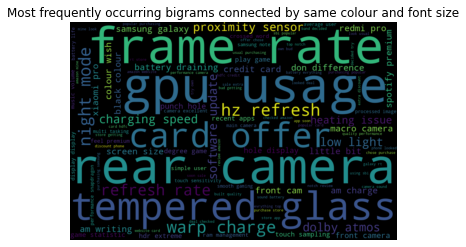

In [55]:
wordCloud.generate_from_frequencies(words_dict)
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()